# Covid Analysis

This project uses data from the World Health Organization regarding covid-19 cases. The data was pulled from the WHO website on 5/29/2022 and consists of daily case and death count entries for countries across the globe. Here we will manipulate and analyze the data using pandas to give us answers to basic questions about the global state of covid.

In [1]:
## import the pandas dataframe and input the raw data pulled from the WHO website
import pandas as pd
data = pd.read_csv('who-covid-data.csv')
print(data.head(5))

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0  


## The Totality of Covid Thus Far

We begin by calculating two basic statistics of each country: The total cases and deaths, and the total cases and deaths in the month of 4/27/2022 - 5/27/2022 (the most recent).

In [2]:
# Initialize dictionaries for case/death totals
total_cases = {}
total_deaths = {}

# Filter entries into only the most recent for each country, and pull the cumulative case and death counts
data_to_date = data[data['Date_reported'] == '2022-05-27']
for _,row in data_to_date.iterrows():
    
    # Define each country along with its case and death counts
    country = row['Country']
    c_cases = row['Cumulative_cases']
    c_deaths = row['Cumulative_deaths']
    
    # Input findings into our total case/death dictionaries
    total_cases[country] = c_cases
    total_deaths[country] = c_deaths
    
# Sort results in descending order
sorted_total_cases = sorted(total_cases.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
sorted_total_deaths = sorted(total_deaths.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

print('Top 10 most cases:')
for i in range(0,10):
    print(sorted_total_cases[i])
    
print('\nTop 10 most deaths:')
for i in range(0,10):
    print(sorted_total_deaths[i])

Top 10 most cases:
('United States of America', 82853070)
('India', 43147530)
('Brazil', 30846602)
('France', 28561540)
('Germany', 26199643)
('The United Kingdom', 22272992)
('Russian Federation', 18315292)
('Republic of Korea', 18053287)
('Italy', 17333299)
('Turkey', 15068094)

Top 10 most deaths:
('United States of America', 996108)
('Brazil', 666037)
('India', 524539)
('Russian Federation', 378784)
('Mexico', 324768)
('Peru', 213134)
('The United Kingdom', 178397)
('Italy', 166358)
('Indonesia', 156565)
('France', 144809)


Above we calculated total case and death numbers. Next, we'll look into more recent numbers.

In [3]:
# Initialize dictionaries for recent case and death counts
recent_cases = {}
recent_deaths = {}

# Filter data into entries from the past month
last_month = data[data['Date_reported'] >= '2022-04-27']
for _, row in last_month.iterrows():
    
    # Define country, new cases, and new deaths for each row
    country = row['Country']
    cases = row['New_cases']
    deaths = row['New_deaths']
    
    # Depending on whether the country has already been entered, 
    # either enter or add to existing case and death counts for 
    # each country until we have totals for the month.
    if country in recent_cases:    
        recent_cases[country] += cases
    else: recent_cases[country] = cases
    
    if country in recent_deaths:    
        recent_deaths[country] += deaths
    else: recent_deaths[country] = deaths
        
# Using the same function as earlier, sort the totals in descending order
sorted_recent_cases = sorted(recent_cases.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
sorted_recent_deaths = sorted(recent_deaths.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

print('Top 10 most cases in the month of 4/27/22 - 5/27/22:')
for i in range(0,10):
    print(sorted_recent_cases[i])
    
print('\nTop 10 most deaths in the month of 4/27/22 - 5/27/22:')
for i in range(0,10):
    print(sorted_recent_deaths[i])

Top 10 most cases in the month of 4/27/22 - 5/27/22:
('United States of America', 2608357)
('Germany', 1879579)
('China', 1601266)
('Australia', 1578043)
('Italy', 1171960)
('France', 1050464)
('Japan', 1049025)
('Republic of Korea', 1043448)
('Portugal', 626873)
('Brazil', 497139)

Top 10 most deaths in the month of 4/27/22 - 5/27/22:
('United States of America', 10169)
('Italy', 3577)
('Russian Federation', 3547)
('The United Kingdom', 3489)
('Brazil', 3391)
('France', 2784)
('Thailand', 1891)
('Canada', 1854)
('Republic of Korea', 1778)
('Spain', 1465)


## Notes
   Both in total and recently it is glaring that the United States has the most covid cases and deaths, and it isn't close. What stands out to me is that after almost a million deaths following covid-19's emergence, the U.S. government continues rolling back safety restrictions, resulting in 2.6 million cases in the last month alone. This is far from just an American issue, however, as the totals below reveal 525 million cases globally and 17.0 million cases in the last month.

   Something to also note is that the countries with the most cases are not necessarily the countries with the most deaths. This could be attributed to many things; presence of different strains, healthcare quality, economic struggles, etc.

In [4]:
# Initialize values for both total and recent data
global_cases = 0
global_deaths = 0
global_cases_r = 0
global_deaths_r = 0

# For each list of case and death counts, sum them together into separate variables
for kv in sorted_total_cases: global_cases += kv[1]
for kv in sorted_total_deaths: global_deaths += kv[1]
for kv in sorted_recent_cases: global_cases_r += kv[1]
for kv in sorted_recent_deaths: global_deaths_r += kv[1]

# Display each total
print('Total Cases Worldwide: ' + str(global_cases))
print('Total Deaths Worldwide: ' + str(global_deaths))
print('Total Cases Worldwide (past 30 days): ' + str(global_cases_r))
print('Total Deaths Worldwide (past 30 days): ' + str(global_deaths_r))

Total Cases Worldwide: 525467084
Total Deaths Worldwide: 6285171
Total Cases Worldwide (past 30 days): 17010699
Total Deaths Worldwide (past 30 days): 51569


## Trends Over the Years
We've visited data of the totality of covid, as well as the recent case and death counts, but what is the correlation? To find out, we'll build two graphs: the trend of cases globally and the trend in the United States of Covid-19 since the data started being tracked by WHO in January 2020.

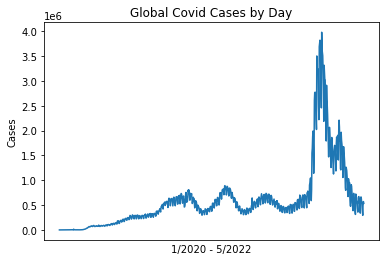

In [6]:
import matplotlib.pyplot as plt, numpy

# Start by grouping our raw together only by date.
# We want a dictionary with keys being dates
# and values being number of cases globally on that day.
daily_cases = {}

# Iterate over raw data and define the date and new cases for each entry
for _, row in data.iterrows():
    date = str(row['Date_reported'])
    cases = row['New_cases']
    
    # Sum up cases from all entries, grouping by date
    if date in daily_cases:
        daily_cases[date] += cases
    else: daily_cases[date] = cases
    
# matplotlib takes in two lists of values for the x and y axes;
# convert dictionary to two lists that can then be inputed into a graph
x = list(daily_cases.keys())
y = list(daily_cases.values())

# set graph labels and display graph
plt.title('Global Covid Cases by Day')
plt.xlabel('1/2020 - 5/2022')
plt.ylabel('Cases')
plt.xticks([])
plt.plot(x,y)
plt.show()

The data shows that after hovering around 500,000 cases per day, there was a spike in cases which we've only recently recovered from. The following code shows that, more specifically, cases peaked at just shy of 4 million at the beginning of 2022. Cases have since drastically declined, however, leaving us back in the same range of around 500,000.

In [14]:
# Identify the peak case count by finding the max of all case count values
peak_cases = max(y)

# Identify where in the data the peak case count is and find the corresponding date
index = y.index(peak_cases)
peak_date = x[index]

# Find the most recent case count and print all findings
latest_cases = daily_cases['2022-05-27']
print('Cases peaked at {} on {}'.format(peak_cases, peak_date))
print('Most recently, there were {} cases on 2022-05-27'.format(latest_cases))

Cases peaked at 3980102 on 2022-01-26
Most recently, there were 534877 cases on 2022-05-27


## Conclusion
Unfortunately, this analysis didn't go as in-depth into covid statistics and trends as I would've liked. For example, which countries have the highest case-to-population ratio; or does economic standing effect the mortality of covid? Luckily the particular dataset I used isn't too intertwined with the code, meaning that later on a more recent data sample could be pulled and imported rather easily. The biggest takeaway for me after briefly studying this data is that we've gotten past a rough patch, but it's not over. The number of cases is right back where it had been before and if we aren't careful there could be more spikes in the near future.

## Programming Takeaways
In what was an effort to showcase my knowledge in Pandas, I didn't quite use as many tools as I would've liked to. The dataset is not very big but perhaps large enough to take a few seconds to process, so loading the data into chunks would have been a good idea here. Adding, removing and altering columns would have also been good ideas. For my first data project, however, I'm content with my work. This project turned out to be more of a foundation with plenty of basic Python and data analysis. My next work will have to include more data augmentation, with a focus on manipulating the data more than observing it.